In [3]:
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()

# CountVectorizer is a text preprocessing tool in scikit-learn that converts a collection of text documents into a bag-of-words representation.

data=pd.read_csv("Train.csv")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


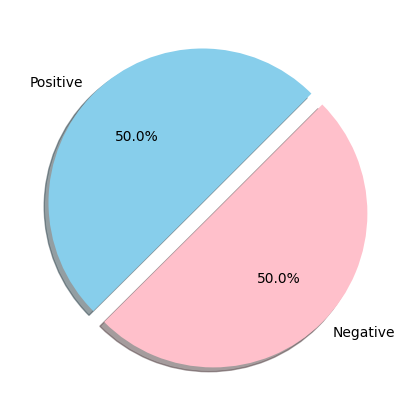

In [4]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [5]:
#  we will import RE, that is, the regular expression operation, we use this library to remove html tags like ‘<a>’ or. So whenever we come across these tags, we replace them with an empty string. Then we will also modify the emojis/emoticons which can be smileys :), a sad face: (or even an upset face: /. We will change the emojis towards the end to get a clean set of text:

import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   
data['text']=data['text'].apply(preprocessor)

<>:6: SyntaxWarning: invalid escape sequence '\)'
<>:7: SyntaxWarning: invalid escape sequence '\W'
<>:6: SyntaxWarning: invalid escape sequence '\)'
<>:7: SyntaxWarning: invalid escape sequence '\W'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5556\4164349032.py:6: SyntaxWarning: invalid escape sequence '\)'
  emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5556\4164349032.py:7: SyntaxWarning: invalid escape sequence '\W'
  text=re.sub('[\W]+',' ',text.lower()) +\


In [ ]:
!pip install nltk

from nltk.stem.porter import PorterStemmer

# PorterStemmer is a stemming algorithm that reduces words to their root form

porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 837.5 kB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.5 MB 837.5 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 882.6 kB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 798.4 kB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 798.4 kB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 849.0 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 893.8 kB/s eta 0:00:00
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using

Positive words are as follows


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


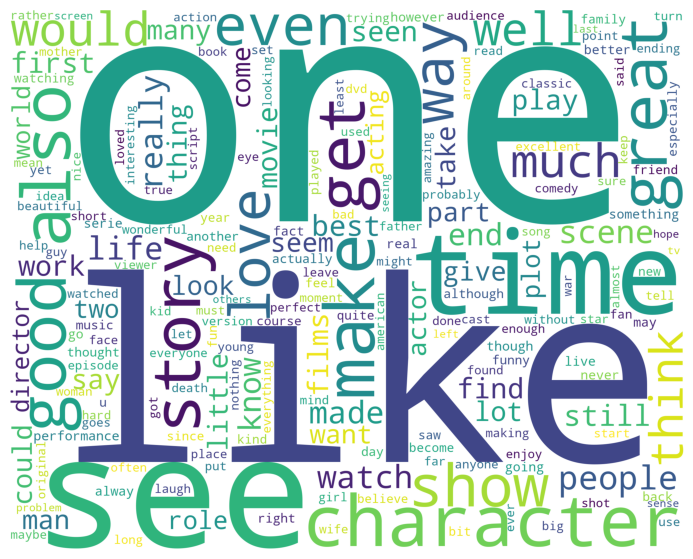

Negative words are as follows


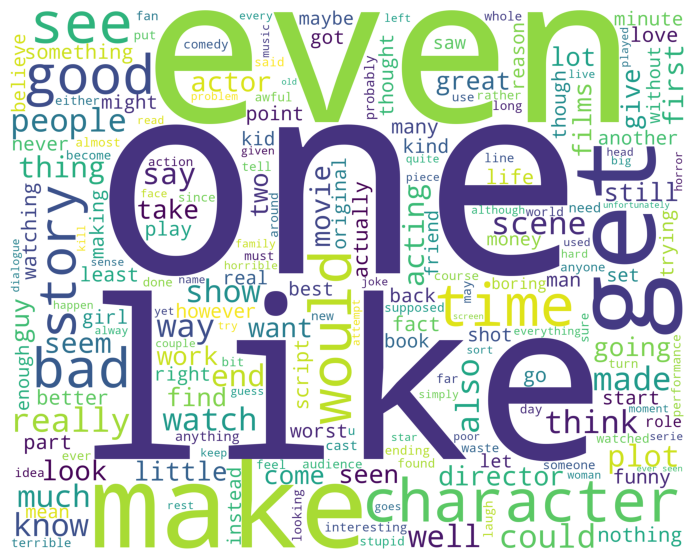

In [9]:
!pip install wordcloud

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

from wordcloud import WordCloud
positivedata = data[ data['label'] == 1]
positivedata =positivedata['text']
negdata = data[data['label'] == 0]
negdata= negdata['text']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.text)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [12]:

from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    8.7s remaining:   17.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.2s finished


Accuracy: 0.89105


In [19]:
clf.predict(tfidf.transform(['this is a good movie']))

array([1])